In [1]:
import pandas as pd

from pytrends.request import TrendReq
pytrend = TrendReq()

from sklearn.decomposition import PCA
import statistics as stat
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
#search_index class gets the monthly search data from google trend using the google tred API
class search_index:

    def __init__(self, word_search, location):
        self.word_search = word_search
        self.location = location

    def df_search_tiator(self):
        
        word_search = self.word_search
        geo_code_province = self.location

        #Creating an empty data frame to add search data
        df_search_main = pd.DataFrame()    
        row_length, col_length = df_search_main.shape 

        for geo_code_index in geo_code_province:
            
            #If the user have list of their own word search 
            #otherwise it uses the google search recomendation
            if isinstance(word_search, list) == True:
                search_queries = word_search

            else:
                #The initial word search
                pytrend.build_payload(kw_list=[word_search], timeframe='all', geo=geo_code_index)
                search_queries = pytrend.related_queries()[word_search]['top']['query'] #this gets the related serch words

                #the data for the initial search
                over_time_search = pytrend.interest_over_time()

                #Inserting data into dataframe
                df_search_main.insert(col_length, (geo_code_index +'_'+ word_search), over_time_search[word_search], True)
                row_length, col_length = df_search_main.shape
            

            #Loops through the search words
            for rel_query in search_queries:

                pytrend.build_payload(kw_list=[rel_query], timeframe='all', geo=geo_code_index)
                rel_query_over_time_search = pytrend.interest_over_time()

                #Inserting data into dataframe 
                df_search_main.insert(col_length, (geo_code_index +'_'+ rel_query), rel_query_over_time_search[rel_query], True)
                row_length, col_length = df_search_main.shape

        return df_search_main, search_queries

In [3]:
def median_tinator(df):
    
    #Demeaning
    for values in df.columns.values:
        u = stat.mean(df[values])
        std = stat.stdev(df[values])

        df[values] = (((df[values] - u)/std) + 10)

    #This on is with base year
    df = df.apply(lambda x: np.floor(((x)/x.iloc[0] * 100)))


    #calculating the median
    arr = []
    for x in df.T.columns.values:    
        arr.append(stat.median(df.T[x]))

    #Putting the array in dataframe
    df_index = pd.DataFrame({'index':arr})
    df_index = df_index.set_index(pd.Index(df.T.columns.values[:]))

    return df_index

***Housing Seach Index and House Price***

In [4]:
df_house_index, search_query = search_index('house for sale',['CA']).df_search_tiator()

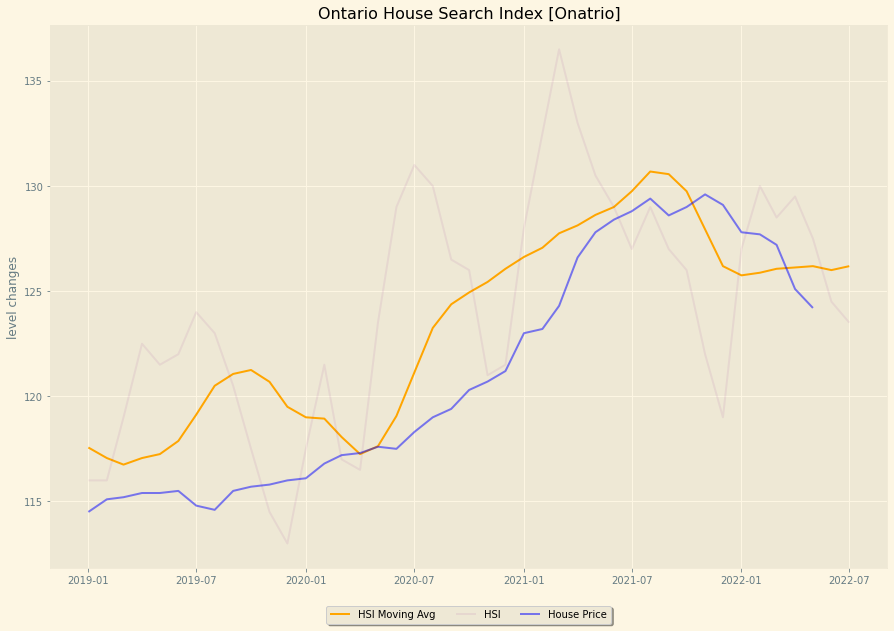

0         house for sale ontario
1                houses for sale
2                 homes for sale
3         house for sale calgary
4         house for sale toronto
5                 house for rent
6                    real estate
7          kijiji house for sale
8        house for sale winnipeg
9          ottawa house for sale
10       house for sale edmonton
11       brampton house for sale
12          remax house for sale
13      vancouver house for sale
14         house for sale surrey
15    house for sale mississauga
16       hamilton house for sale
17     house for sale in calgary
18    house for sale in brampton
19      house for sale in surrey
20        house for sale windsor
21             for sale by owner
22       house for sale by owner
23     house for sale in toronto
24       house for sale montreal
Name: query, dtype: object

In [5]:
#Calling the index
df_house_index = median_tinator(df_house_index[:])
df_house_index_ma = df_house_index.rolling(window =8).mean() #Moving Average


#Loading the actual house price data
filename = 'ON_house_price_data_2.xlsx'

xls=pd.ExcelFile(filename) 
df_hp = pd.read_excel(xls)
df_hp = df_hp.set_index(pd.Index(df_house_index.T.columns.values[180:221])).iloc[:,:]


#Data Visual
with plt.style.context('Solarize_Light2'):
    plt.rcParams['figure.figsize'] = [15, 10]
    
    plt.plot(df_house_index_ma[180:], color='orange')
    plt.plot(df_house_index[180:], color='purple', alpha=0.07)
    plt.plot(df_hp.iloc[:,1:]+115, color='blue', alpha=0.5)
    
    #Labling the plot
    plt.title('Ontario House Search Index [Onatrio]')
    plt.ylabel('level changes', fontsize=12)
    plt.legend(['HSI Moving Avg','HSI','House Price'], loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=4)

plt.show()
search_query


***Flight Activity***

In [354]:
df, search_query = search_index('google flight',['CA']).df_search_tiator()

C:\Users\zerocool\AppData\Local\Temp/ipykernel_9228/3840216810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[values] = (((df[values] - u)/std) + 10)


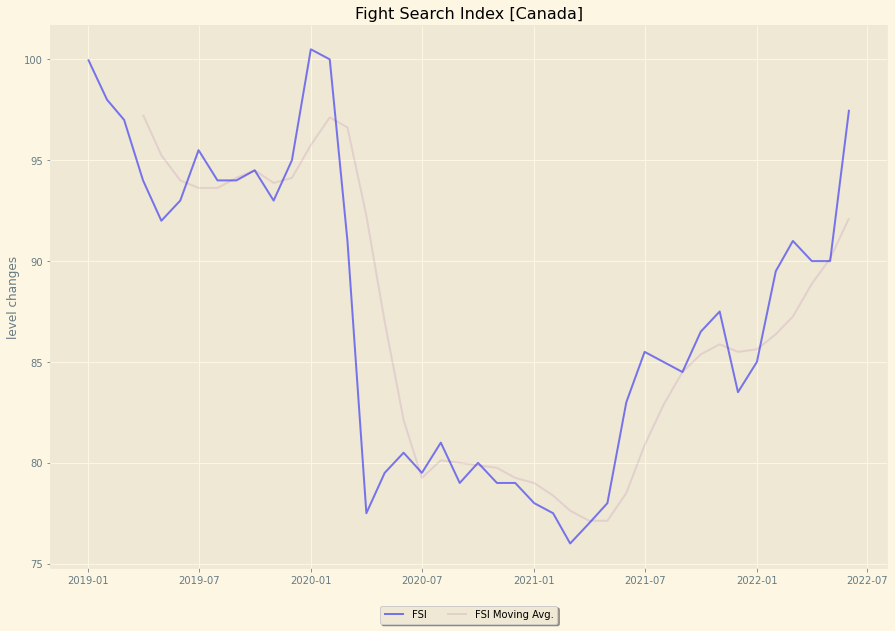

0                    google flights
1                           flights
2                 air canada flight
3                        air canada
4                      google earth
5               google earth flight
6                 google flight map
7                      cheap flight
8           google flight simulator
9                  flight simulator
10            google flights canada
11                   flight tracker
12                          expedia
13                   expedia flight
14                          westjet
15                   westjet flight
16    google earth flight simulator
17                    flight status
18                           travel
19                    google travel
20                    flight centre
21                    cheap flights
22                   flight network
23           google flight explorer
24                  flight explorer
Name: query, dtype: object

In [355]:
#Calling the index
df_flight = median_tinator(df[180:])
df_flight_ma = df_flight.rolling(window =4).mean() #Moving Average

#Data Visual
with plt.style.context('Solarize_Light2'):
    plt.rcParams['figure.figsize'] = [15, 10]
    
    plt.plot(df_flight[:], color='blue', alpha=0.5)
    plt.plot(df_flight_ma[:], color='purple', alpha=0.1)
    
    #Labling the plot
    plt.title('Fight Search Index [Canada]')
    plt.ylabel('level changes', fontsize=12)
    plt.legend(['FSI', 'FSI Moving Avg.'], loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=4)

plt.show()
search_query

**Sahm Rule and Chozin Rule**

In [356]:
df, search_query = search_index('recession',['US']).df_search_tiator()

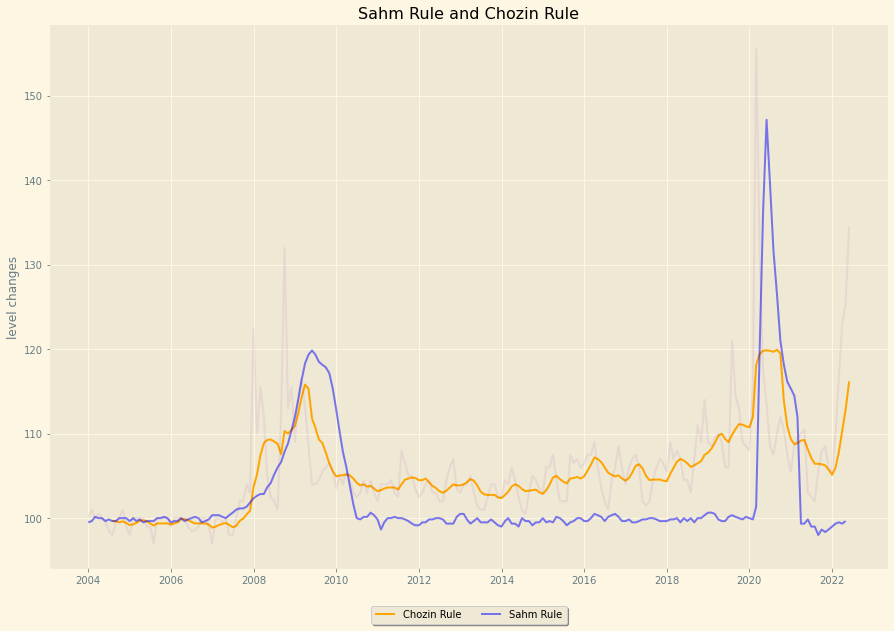

0               the recession
1             great recession
2           what is recession
3        recession definition
4         what is a recession
5                us recession
6           economy recession
7                     economy
8         the great recession
9          economic recession
10             2008 recession
11              gum recession
12                 depression
13                  inflation
14                        gdp
15            recession proof
16    definition of recession
17           great depression
18          recession of 2008
19             recession 2020
20             last recession
21               stock market
22     stock market recession
23                     stocks
24    united states recession
Name: query, dtype: object

In [377]:
#Calling the index
df_rule = median_tinator(df[:])
df_rule_ma = df_rule.rolling(window =8).mean() #Moving Average

#Loading the excel file
filename = 'search_data.xlsx'
xls=pd.ExcelFile(filename) 
df_2 = pd.read_excel(xls)
sahm_rule = df_2.set_index(pd.Index(df.T.columns.values[:221])).iloc[:,:]

#Data Visual
with plt.style.context('Solarize_Light2'):
    plt.rcParams['figure.figsize'] = [15, 10]
    
    plt.plot(df_rule_ma[:], color='orange')
    plt.plot(sahm_rule.iloc[:,1:]*5+100, color='blue', alpha=0.5)
    plt.plot(df_rule[:], color='purple', alpha=0.07)
    
    #Labling the plot
    plt.title('Sahm Rule and Chozin Rule')
    plt.ylabel('level changes', fontsize=12)
    plt.legend(['Chozin Rule','Sahm Rule'], loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=4)

plt.show()

search_query

In [9]:
from time import sleep


df_house_index_us, search_query = search_index('house for sale',['US']).df_search_tiator()
sleep(10)

df_house_index_ca, search_query = search_index('house for sale',['CA']).df_search_tiator()
sleep(10)

df_house_index_uk, search_query = search_index('house for sale',['GB']).df_search_tiator()
sleep(10)

df_house_index_nz, search_query = search_index('house for sale',['NZ']).df_search_tiator()
sleep(10)

df_house_index_au, search_query = search_index('house for sale',['AU']).df_search_tiator()
sleep(10)

In [10]:
df_us = median_tinator(df_house_index_us[172:])
df_ca = median_tinator(df_house_index_ca[172:])
df_uk = median_tinator(df_house_index_uk[172:])
df_nz = median_tinator(df_house_index_nz[172:])
df_au = median_tinator(df_house_index_au[172:])

C:\Users\zerocool\AppData\Local\Temp/ipykernel_18624/3840216810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[values] = (((df[values] - u)/std) + 10)


In [18]:
df_us_ma = df_us.rolling(window =8).mean() 
df_ca_ma = df_ca.rolling(window =8).mean()
df_uk_ma = df_uk.rolling(window =8).mean()
df_nz_ma = df_nz.rolling(window =8).mean()

In [19]:
df_au_ma = df_au.rolling(window =8).mean()

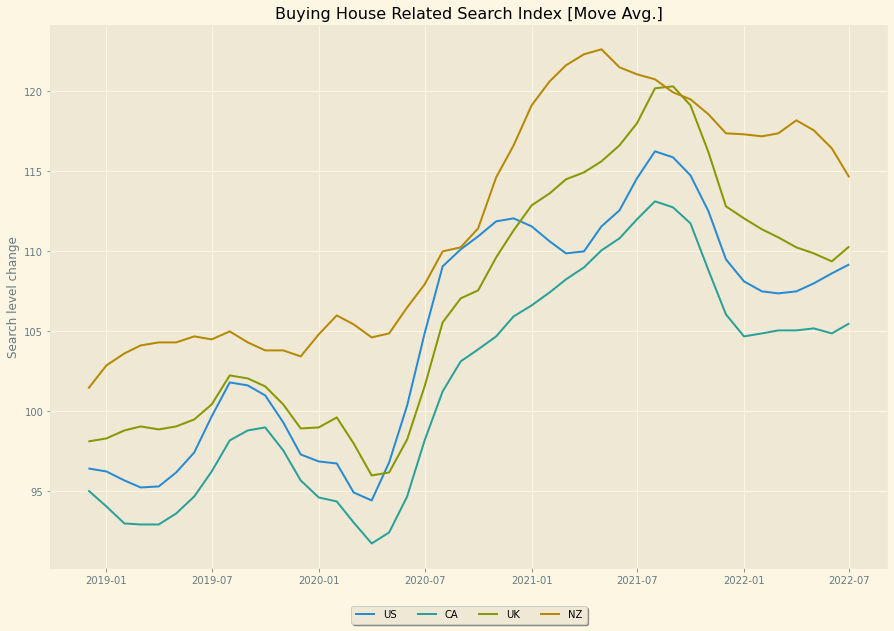

In [27]:
#Data Visual
with plt.style.context('Solarize_Light2'):
    plt.rcParams['figure.figsize'] = [15, 10]
    
    plt.plot(df_us_ma)
    plt.plot(df_ca_ma)
    plt.plot(df_uk_ma)
    plt.plot(df_nz_ma)
   
    #Labling the plot
    plt.title('Buying House Related Search Index [Move Avg.]')
    plt.ylabel('Search level change', fontsize=12)
    plt.legend(['US','CA','UK','NZ'], loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=4)

plt.show()